In [1]:
import sys
sys.path.append('/Users/mnannan/dev/supelec/ngsa/assignments/Assignement 2 ')

In [2]:
from main import pipeline
from core.io.loader import *
from features.features_extractor import FeaturesExtractor
from features.processing import features_processing
from models.cross_validation import *
from plot.features_importances import plot_features_importances

In [22]:
from datetime import datetime

In [3]:
%matplotlib inline

###### Load dataset and extract features

In [4]:
train = get_data_with_node_information('train', data_dir='../data')
test = get_data_with_node_information('test', data_dir='../data')
features_extractor = FeaturesExtractor(pipeline)
train = features_extractor.fit_transform(train)
test = features_extractor.transform(test)

###### Selecting features and preprocessing

In [10]:
selected_columns = [
    'title_overlap',
    'publication_date_diff',
    'common_authors',
    'same_journal',
    'authors_collaboration',
    'collaboration_min_distance',
    'collaboration_mean_distance',
    'writer_in_target_paper',
    'writer_collaborators',
    'writer_collaboration_min_distance',
    'writer_collaboration_mean_distance',
    'common_neighbors',
    'source_paper_citations',
    'target_paper_citations',
    'source_number_of_papers_cited',
    'target_number_of_papers_cited',
]

In [11]:
x_train = features_processing(train[selected_columns]).values

In [12]:
x_test = features_processing(test[selected_columns]).values

In [13]:
y_train = train.category.values

In [14]:
from sklearn.ensemble import RandomForestClassifier

model_args = {
    'n_estimators': 100,
    'max_depth': 7,
    'random_state': seed
}

In [15]:
y_pred, f1_list = cross_validation(RandomForestClassifier, model_args, x_train, y_train)

Epoch 1
f1: 0.9687712254539416
Epoch 2
f1: 0.9688870707483921
Epoch 3
f1: 0.9681761992341786
Epoch 4
f1: 0.9695596001722614
Epoch 5
f1: 0.9689400636158269


In [16]:
model = RandomForestClassifier(**model_args)

In [17]:
model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [18]:
y_pred = model.predict(x_test)

source_target_common_neighbors        0.564278
target_paper_citations                0.146488
publication_date_diff                 0.109798
source_number_of_papers_cited         0.052337
title_overlap                         0.043227
collaboration_mean_distance           0.029609
collaboration_min_distance            0.020485
writer_collaboration_mean_distance    0.009463
target_number_of_papers_cited         0.008017
writer_collaboration_min_distance     0.006834
common_authors                        0.004276
authors_collaboration                 0.002450
source_paper_citations                0.001425
same_journal                          0.000534
writer_collaborators                  0.000442
writer_in_target_paper                0.000339
dtype: float64


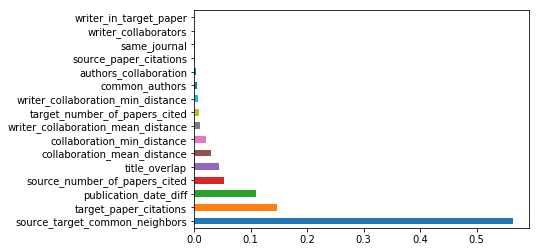

In [19]:
plot_features_importance(model.feature_importances_, selected_columns)

In [20]:
y_pred = pd.Series(data=y_pred).rename('category').rename_axis('id', axis='index')

In [24]:
y_pred.to_csv(f'../submissions/rf_graph_features_{datetime.now().isoformat().split(".")[0]}.csv'
              ,header=True)

In [25]:
date = datetime.now().isoformat().split(".")[0]
prediction_name = 'rf_graph_features_{date}.csv'.format(date=date)
prediction_dir = '../submissions'
y_pred = model.predict(x_test)
y_pred = pd.Series(data=y_pred).rename('category').rename_axis('id', axis='index')
y_pred.to_csv(os.path.join(prediction_dir, prediction_name), header=True)

# 0.95532 on the leaderboard